In [1]:
import re
import spacy
import pandas as pd
import nltk

Read in the original raw/joined file

In [2]:
df = pd.read_csv('C:/Users/tyler/Desktop/imessages_extract.csv')

#### Replace all non-letters with spaces

In [3]:
df['text'] = df['text'].apply(lambda x: re.sub("[^a-zA-Z]", " ", str(x)).lower()) # gets rid of emojis and makes it lower
df['text'].to_pickle('C:/users/tyler/desktop/texts_simple_lower.pkl') # save the simple version for text generation

### Word Cloud of Everything

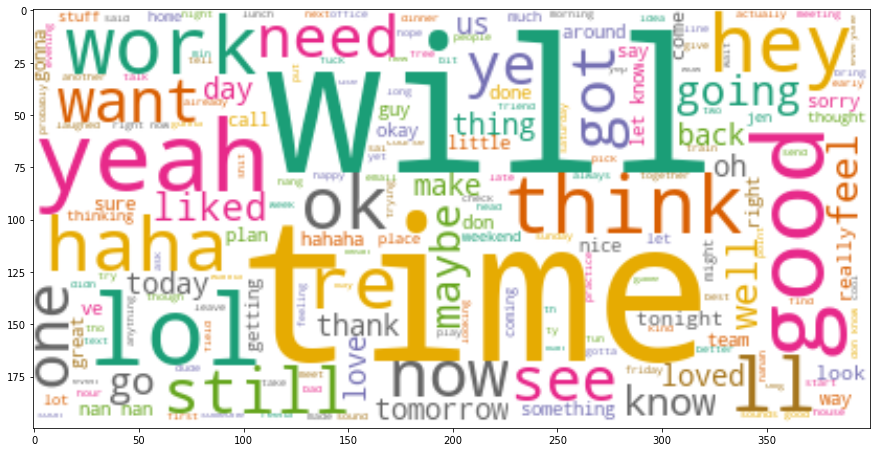

In [4]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(background_color='white', colormap='Dark2')
all_texts = [text for text in df['text']]
all_texts = ' '.join(all_texts)

cloud_texts = wc.generate(all_texts)

plt.figure(figsize=(12, 10))
plt.imshow(cloud_texts, interpolation='bilinear')

#### Lammetize

In [5]:
sp = spacy.load('en_core_web_sm')
def lemmatize_text(text):
    text = sp(text)
    return [word.lemma_ for word in text] # this takes a while

In [6]:
df['tokenize_text'] = df.text.apply(lemmatize_text)

In [7]:
df

text  handle_id  \
0                                                sup dog          1   
1                                 hang some time sunday           1   
2                              or tonight right now  lol          1   
3                      sunday should work  in la tonight          1   
4                             hot dog  enjoy the angels           1   
...                                                  ...        ...   
50756  just calling to catch up  call when you can  l...         36   
50757  i should be home around      fyi if that has a...          2   
50758  i don t expect you to wait for me and if for s...          2   
50759  sounds good  i went ahead and ate a little bit...          2   
50760                    ugh     min  i m packing up now          2   

             date  message_date            timestamp  month  year  is_sent  \
0      2018-08-22  5.566830e+17  2018-08-22 19:04:31      8  2018        1   
1      2018-08-22  5.566830e+17  2018-08-22 19:04:53      8  2018        1   
2      2018-08-22  5.566830e+17  2018-08-22 19:05:08      8  2018        1   
3      2018-08-22  5.566830e+17  2018-08-22 19:09:52      8  2018        0   
4      2018-08-22  5.566830e+17  2018-08-22 19:10:15      8  2018        1   
...           ...           ...                  ...    ...   ...      ...   
50756  2020-02-16  6.035982e+17  2020-02-16 18:10:47      2  2020        0   
50757  2020-02-16  6.035982e+17  2020-02-16 18:09:52      2  2020        0   
50758  2020-02-16  6.035982e+17  2020-02-16 18:10:17      2  2020        0   
50759  2020-02-16  6.036021e+17  2020-02-16 19:14:18      2  2020        1   
50760  2020-02-16  6.036027e+17  2020-02-16 19:25:34      2  2020        0   

       message_id  phone_number  chat_id  \
0               1  +16142888469      1.0   
1               2  +16142888469      1.0   
2               3  +16142888469      1.0   
3               4  +16142888469      1.0   
4               5  +16142888469      1.0   
...           ...           ...      ...   
50756       50781  +12564903648     33.0   
50757       50782  +12563616162      2.0   
50758       50783  +12563616162      2.0   
50759       50784  +12563616162      2.0   
50760       50785  +12563616162      2.0   

                                           tokenize_text  
0                                             [sup, dog]  
1                             [hang, some, time, sunday]  
2                      [or, tonight, right, now,  , lol]  
3             [sunday, should, work,  , in, la, tonight]  
4                       [hot, dog,  , enjoy, the, angel]  
...                                                  ...  
50756  [just, call, to, catch, up,  , call, when, -PR...  
50757  [i, should, be, home, around,      , fyi, if, ...  
50758  [i, don, t, expect, -PRON-, to, wait, for, -PR...  
50759  [sound, good,  , i, go, ahead, and, eat, a, li...  
50760           [ugh,     , min,  , i, m, pack, up, now]  

[50761 rows x 12 columns]

#### Tokenize
I think they're already tokenized from the lammetization

In [12]:
# df['tokenize_text'] = df['tokenize_text'].apply(nltk.word_tokenize) #tokenize each row

### Save

In [11]:
df.to_pickle('C:/users/tyler/desktop/texts_lammetized.pkl') # save the detokenized version